# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('avito-text-classification/train.csv')
test = pd.read_csv('avito-text-classification/test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
# проверяем по всему датасету, есть ли у нас пропущенные значения
train.isnull().any().any()

True

In [6]:
# проверяем, в каком столбце они находятся 
train.isnull().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [7]:
# делаем то же самое для тестовой выборки 
test.isnull().any().any()

True

In [8]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [9]:
# заполняем пропуски пустой строчкой
train = train.fillna('')
test = test.fillna('')

In [10]:
train.isnull().any().any()

False

In [11]:
test.isnull().any().any()

False

Прогнали последние две строчки для того, чтобы убедиться, что больше нет пропущенных значений.

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [12]:
train['textdata'] = train['title']+' '+train['description']

In [13]:
train.head() # проверяю, что все нормально сконкатенировалось и попало в отдельный столбец

,title,description,Category_name,Category,textdata
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


In [14]:
# то же самое для тестовой выборки
test['textdata'] = test['title']+' '+test['description']

In [15]:
test.head()

,title,description,itemid,textdata
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [16]:
# вывожу это, чтобы понять, какие уникальные классы у нас есть 
# также здесь есть количество наблюдений для каждого класса, что потом пригодится, чтобы выбрать самый большой и самый маленький классы
unique_classes = train['Category'].value_counts()
unique_classes

27     765120
10     740701
29     577499
30     206517
20     156737
24     142236
19     138691
9      125778
114    120152
84     113684
36     100606
39      85369
32      83332
88      72445
21      70938
101     68078
83      59055
28      58930
25      48234
87      42540
40      32136
111     27109
26      27016
97      26325
105     24786
106     23113
42      21930
34      19488
99      19472
98      18456
38      17520
81      17167
82      16987
90      15440
31      14921
89      13713
96      13700
85      13327
94      13276
112     13049
102     12169
93      11875
14      11847
23      11679
92       5231
11       4879
116      4124
91       3614
33       2886
86        165
Name: Category, dtype: int64

In [17]:
len(unique_classes) 

50

Длина списка с уникальными классами - 50. Ответ: всего у нас 50 классов 

In [18]:
import matplotlib.pyplot as plt

Поскольку нам нужно построить столбчатую диаграмму, в которой по оси y - частоты по наблюдениям в каждом классе, буду строить гистограмму (histplot).

Text(0, 0.5, 'Частоты')

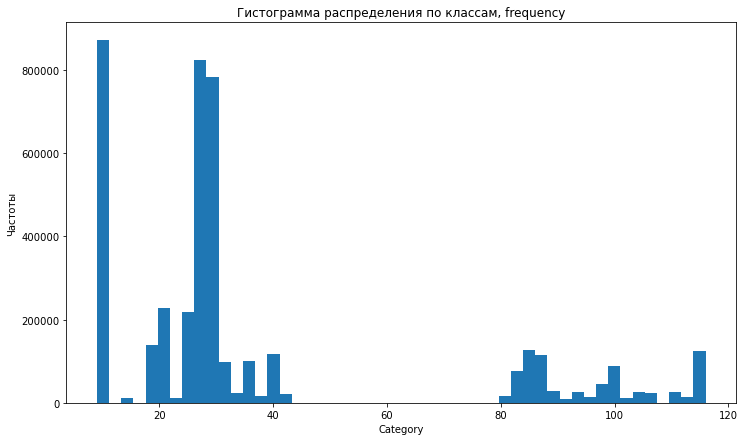

In [19]:
fig =plt.figure(figsize=(12,7))
ax = fig.add_subplot()


plt.hist(train['Category'], bins=len(unique_classes))
plt.title('Гистограмма распределения по классам, frequency')
ax.set_xlabel('Category')
ax.set_ylabel('Частоты')

Далее все то же самое. Строим по-прежнему гистограмму, добавляя теперь параметр density=True, чтобы нормировать частоты и видеть доли, а не абсолютные значения. График должен получиться такой же по форме, меняются только значения на оси Y.

Text(0, 0.5, 'Probability density')

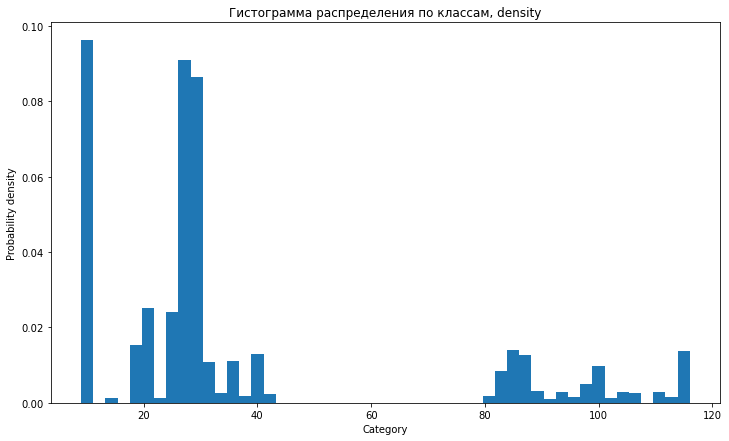

In [20]:
fig =plt.figure(figsize=(12,7))
ax = fig.add_subplot()


plt.hist(train['Category'], bins=len(unique_classes), density=True)
plt.title('Гистограмма распределения по классам, density')
ax.set_xlabel('Category')
ax.set_ylabel('Probability density')

Теперь нам нужно найти класс, который имеет наибольшую долю в выборке, и класс, который имеет наименьшую долю. На мой взгляд проще всего это сделать с помощью списка, который мы уже вывели раньше. Так как в value_counts список уже упорядоченный, количество наблюдений в наибольшем классе - это нулевой элемент списка, в наименьшем - последний элемент. 
Также, по value_counts определили, что самый популярный класс - 27, наименее популярный - 86.

In [21]:
# этот список выглядит вот так
classes = list(train['Category'].value_counts())
classes

[765120,
 740701,
 577499,
 206517,
 156737,
 142236,
 138691,
 125778,
 120152,
 113684,
 100606,
 85369,
 83332,
 72445,
 70938,
 68078,
 59055,
 58930,
 48234,
 42540,
 32136,
 27109,
 27016,
 26325,
 24786,
 23113,
 21930,
 19488,
 19472,
 18456,
 17520,
 17167,
 16987,
 15440,
 14921,
 13713,
 13700,
 13327,
 13276,
 13049,
 12169,
 11875,
 11847,
 11679,
 5231,
 4879,
 4124,
 3614,
 2886,
 165]

In [22]:
print('Доля наиболее популярного класса - 27 :', classes[0]/sum(classes))
print('Доля наименее популярного класса - 86 :', classes[-1]/sum(classes))

Доля наиболее популярного класса - 27 : 0.1807067572782698
Доля наименее популярного класса - 86 : 3.8969854337769914e-05


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [23]:
# здесь и далее: я буду работать с кусочком выборки в 100К наблюдений, чтобы избежать Memory Error
# создаю сэмпл

import numpy as np
np.random.seed(420)

train_new = train.sample(100000)
train_new

,title,description,Category_name,Category,textdata
4144085,Трубы дренажные,*В Лугу действует только доставка. Самовывоз с...,Ремонт и строительство,19,Трубы дренажные *В Лугу действует только доста...
422559,"KIA Sportage, 2011",Автомобиль в отличном состоянии!/\n /\nПолност...,Автомобили,9,"KIA Sportage, 2011 Автомобиль в отличном состо..."
334626,Nikon d5100 +Nikon 18-105,Продаю отличный зеркальный фотоаппарат Nikon d...,Фототехника,105,Nikon d5100 +Nikon 18-105 Продаю отличный зерк...
1164276,"Услуги Камаз самосвал, Экскаватор","Услуги : Камаз самосвал, экскаватор (ковш 0,7 ...",Предложение услуг,114,"Услуги Камаз самосвал, Экскаватор Услуги : Кам..."
246880,Джинсы,Джинсы,"Одежда, обувь, аксессуары",27,Джинсы Джинсы
...,...,...,...,...,...
3972596,Оригинальная упаковка мон блан,Самовывоз- 1 мин от метро Пражская-бесплатно. ...,"Одежда, обувь, аксессуары",27,Оригинальная упаковка мон блан Самовывоз- 1 ми...
2319982,Поперечные рейлинги(багажник) саббуфер audi q5,Возможен торг.,Запчасти и аксессуары,10,Поперечные рейлинги(багажник) саббуфер audi q5...
969120,Новые колготки,"Новые колготки из Польши, Кореи, Белоруссии от...",Детская одежда и обувь,29,"Новые колготки Новые колготки из Польши, Кореи..."
2208578,Шланг сцепления газ 3110,Новый шланг сцепления Волга 402 двигатель.,Запчасти и аксессуары,10,Шланг сцепления газ 3110 Новый шланг сцепления...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X4 = cnt_vec.fit_transform(train_new['textdata'])

In [25]:
print('Размер полученной матрицы:', X4.shape)

Размер полученной матрицы: (100000, 231754)


## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [26]:
# вывожу словарь
cnt_vec.vocabulary_

{'трубы': 212444,
 'дренажные': 109567,
 'лугу': 136873,
 'действует': 105194,
 'только': 210313,
 'доставка': 109039,
 'самовывоз': 192879,
 'нашего': 148907,
 'склада': 197361,
 'по': 168406,
 'адресу': 78169,
 'пискарёвский': 166917,
 'проспект': 181875,
 '150': 6810,
 'цб': 222720,
 'зелёный': 117056,
 'купол': 133198,
 'режим': 188679,
 'работы': 184636,
 'пн': 168293,
 'пт': 183199,
 '00': 0,
 'до': 107655,
 '19': 9011,
 'сб': 193606,
 '10': 2862,
 '14': 6276,
 'от': 158846,
 'двух': 104623,
 'км': 126513,
 'спец': 201710,
 'цены': 223284,
 'труба': 212389,
 'дренажная': 109563,
 'ф110': 217610,
 'фильтре': 218821,
 'перфорацией': 165990,
 '53': 23230,
 'без': 83893,
 'фильтра': 218813,
 '51': 22522,
 'перфорации': 165991,
 'ф160': 217616,
 '116': 4555,
 'отматываем': 159964,
 'на': 146099,
 'отрез': 160445,
 '75': 28597,
 '70': 27717,
 'руб': 191196,
 'за': 112576,
 'ого': 155242,
 'метра': 141541,
 'также': 207279,
 'всегда': 95542,
 'наличии': 147351,
 'геотекстиль': 99908,
 '

In [27]:
# список со значениями
cnt_vec.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '00000001888',
 '0000000193511',
 '00000001985',
 '0000000266796',
 '00000002739',
 '0000000310543',
 '0000000310604',
 '0000000337472',
 '0000000374668',
 '0000000404808',
 '0000000455190',
 '0000000510370',
 '0000000550260',
 '0000000552011',
 '00000005675',
 '0000000638852',
 '0000000666183',
 '0000000667227',
 '0000000700900',
 '0000000731935',
 '0000000738644',
 '0000000740753',
 '0000000742870',
 '0000000745727',
 '0000000748629',
 '0000000754927',
 '0000000758123',
 '0000000758291',
 '0000000760539',
 '0000000769594',
 '0000000777599',
 '0000000780001',
 '0000000782234',
 '0000000789141',
 '0000000789622',
 '0000000810807',
 '0000000814379',
 '0000000816632',
 '0000000834520',
 '0000000836036',
 '0000000841849',
 '0000000845540',
 '0000000850025',
 '0000000850247',
 '0000000851145',
 '0000000851749',
 '0000000855990',
 '0000000857833',
 '0000000861267',
 '0000000861519',
 '0000000862059',
 '0000000865333',
 '0000000871150

In [28]:
# ищу "слова", которые начинаются на цифру
# это список всех таких слов
starts_num = [word for word in cnt_vec.get_feature_names() if word[0].isnumeric()]

In [29]:
print('Количество слов, которые начинаются на цифру:', len(starts_num))

Количество слов, которые начинаются на цифру: 33910


In [30]:
# создаю список с символами пунктуации
from string import punctuation
punct = list(punctuation)

In [31]:
starts_punct = [word for word in cnt_vec.get_feature_names() if word[0] in punct]
print('Количество слов, которые начинаются на знак пунктуации:', len(starts_punct))

Количество слов, которые начинаются на знак пунктуации: 202


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [32]:
# загружаю фреймворки
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [33]:
def my_tokenizer(text):
    text = text.lower() # привожу к нижнему регистру 
    tokens = word_tokenize(text) # разбиваю текст на токены
    stemmer = SnowballStemmer('russian') # определяю стеммер
    tokenizer_result = [stemmer.stem(i) for i in tokens if i.isalpha() and i not in stopwords.words('russian')] 
    
    # прохожусь стеммером и циклом по всем токенам, с помощью isalpha проверяю, чтобы токен состоял только из букв (нет чисел и пунктуации)
    # тут же выкидываю токены, которые есть в списке стоп-слов 
    
    return tokenizer_result

In [34]:
# так выглядит первое наблюдение в выборки до токенизации
train['textdata'][0]

'Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год Комплект ЭБУ (мозги, компьютер мотора, двигателя, коммутатор). Электронный блок управления двигателем (компьютер мотора) для Рено Kangoo (Канго Кангу), Меган, Сценик, Laguna (Лагуна), Clio (Клио), Nissan Micra (Ниссан Микра) и другие Рено Ниссан 1,5 дизель с топливной аппаратурой Делфи. Б.У. Оригинал, отличное состояние, проверенные с гарантией.\xa0/\n /\n\xa0............................................................................................./\n /\nНа все запчасти предоставляется\xa0ГАРАНТИЯ, возможна\xa0установка.\xa0Более подробно — в разделе «о компании». Мы дорожим своей репутацией и торгуем\xa0ТОЛЬКО ЛЕГАЛЬНЫМИ\xa0контрактными запчастями - на все детали в наличии таможенные документы. Все запчасти - от автомобилей\xa0БЕЗ ПРОБЕГА ПО РОССИИ.\xa0/\n /\n--- -------------------------------------------------------------------------------------------------/\n /\nОтправляем в другие регионы Таможенного Союза транспортной компание

In [35]:
# так выглядит первое наблюдение в выборке после токенизации
result = my_tokenizer(train['textdata'][0])
result

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

In [36]:
# то же самое, только красиво и читабельно 
print(' '.join(result))

эб renault nissan dci delphi год комплект эб мозг компьютер мотор двигател коммутатор электрон блок управлен двигател компьютер мотор рен kangoo канг канг мега сценик laguna лагун clio кли nissan micra нисса микр друг рен нисса дизел топливн аппаратур делф оригина отличн состоян проверен гарант запчаст предоставля гарант возможн установк подробн раздел компан дорож сво репутац торгу легальн контрактн запчаст дета налич таможен документ запчаст автомобил пробег росс отправля друг регион таможен союз транспортн компан наложн платеж


## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

Будем использовать тот же семпл на 100К наблюдений, который использовали ранее (train_new):

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer(tokenizer = my_tokenizer)
X7 = cnt_vec.fit_transform(train_new['textdata'])

In [38]:
print('Размер полученной матрицы:', X7.shape)

Размер полученной матрицы: (100000, 84041)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

np.random.seed(420)

In [40]:
y = train_new['Category']
X7_train, X7_test, y_train, y_test = train_test_split(X7, y, test_size=0.2)

In [41]:
clf = SGDClassifier()
clf.fit(X7_train, y_train)

SGDClassifier()

In [42]:
y_true = y_test
y_pred = clf.predict(X7_test)
acc7 = accuracy_score(y_true, y_pred)
print('Accuracy на тестовой выборке:', acc7)

Accuracy на тестовой выборке: 0.83085


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer = my_tokenizer)
X8 = tfidf_vec.fit_transform(train_new['textdata'])

In [44]:
print('Размер полученной матрицы:', X8.shape)

Размер полученной матрицы: (100000, 84041)


Как изменился размер матрицы: не изменился.

In [45]:
X8_train, X8_test, y_train, y_test = train_test_split(X8, y, test_size=0.2)
clf.fit(X8_train, y_train)
y_true = y_test
y_pred = clf.predict(X8_test)
acc8 = accuracy_score(y_true, y_pred)
print('Accuracy на тестовой выборке:', acc8)

Accuracy на тестовой выборке: 0.8304


Как изменилось качество: accuracy незначительно снизилась.

In [46]:
print('Accuracy упала на:', acc7-acc8)

Accuracy упала на: 0.00044999999999995044


In [47]:
tfidf_vec = TfidfVectorizer(tokenizer = my_tokenizer, max_df=0.9)
X8_2 = tfidf_vec.fit_transform(train_new['textdata'])

In [48]:
print('Размер полученной матрицы:', X8_2.shape)

Размер полученной матрицы: (100000, 84041)


Как изменился размер матрицы: не изменился.

In [49]:
X8_2_train, X8_2_test, y_train, y_test = train_test_split(X8_2, y, test_size=0.2)
clf.fit(X8_2_train, y_train)
y_true = y_test
y_pred = clf.predict(X8_2_test)
acc8_2 = accuracy_score(y_true, y_pred)
print('Accuracy на тестовой выборке:', acc8_2)

Accuracy на тестовой выборке: 0.82985


Как изменилось качество: accuracy незначительно снизилась по сравнению с результатом из пунктов 7 и 8.1

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [50]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vec = HashingVectorizer(tokenizer = my_tokenizer, n_features = 30000)
X9 = hash_vec.fit_transform(train_new['textdata'])

C:\miniconsa\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [51]:
print('Размер полученной матрицы:', X9.shape)

Размер полученной матрицы: (100000, 30000)


In [52]:
X9_train, X9_test, y_train, y_test = train_test_split(X9, y, test_size=0.2)
clf.fit(X9_train, y_train)
y_true = y_test
y_pred = clf.predict(X9_test)
acc9 = accuracy_score(y_true, y_pred)
print('Accuracy на тестовой выборке:', acc9)

Accuracy на тестовой выборке: 0.80965


**Что получилось:**
Наилучшее качество по метрике accuracy - для векторайзера CountVectorizer.

In [54]:
print('accuracy score for CountVectorizer (7):', acc7)
print('accuracy score for TfidfVectorizer (8):', acc8)
print('accuracy score for TfidfVectorizer, max_df = 0.9 (8.2):', acc8_2)
print('accuracy score for HashingVectorizer (9):', acc9)

accuracy score for CountVectorizer (7): 0.83085
accuracy score for TfidfVectorizer (8): 0.8304
accuracy score for TfidfVectorizer, max_df = 0.9 (8.2): 0.82985
accuracy score for HashingVectorizer (9): 0.80965


## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [53]:
hash_vec = HashingVectorizer(tokenizer = my_tokenizer, n_features = 30000)
X10 = cnt_vec.transform(test['textdata'])

clf = SGDClassifier()
y_pred = clf.predict(X10)

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x000002455662EDC0>
Traceback (most recent call last):
  File "C:\miniconsa\lib\site-packages\nltk\data.py", line 1160, in __del__
    self.close()
  File "C:\miniconsa\lib\site-packages\nltk\data.py", line 1195, in close
    self.stream.close()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame({'Id':test['itemid'], 'Category':y_pred})
df

In [ ]:
df.to_csv(index=False)